카이제곱 관련 쓰려면
pip install pandas matplotlib scipy

seaborn 없으면 
pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
Mush = pd.read_csv('Mushroom2.csv')
Mush = Mush[['poison','odor','bruises','spore_print_color', 'population', 'habitat']]
Mush

,poison,odor,bruises,spore_print_color,population,habitat
0,poison,pungent,bruises,black,nscattered,urban
1,enable,almond,bruises,brown,numerous,grasses
2,enable,anise,bruises,brown,numerous,meadows
3,poison,pungent,bruises,black,nscattered,urban
4,enable,none,no,brown,abundant,grasses
...,...,...,...,...,...,...
8119,enable,none,no,buff,clustered,leaves
8120,enable,none,no,buff,several,leaves
8121,enable,none,no,buff,clustered,leaves
8122,poison,fishy,no,white,several,leaves


In [4]:
# chi2_contingency << 교차표 제작 후 해당 교차표를 변수로 사용 시 카이제곱한 결과 출력
# statistic이 카이제곱 검정값, 관측 빈도와 기대 빈도 간 차이 의미 // 해당 값으로는 결론 불가능
# p-value = 본판, 0.05 보다 작다면 두 변수간의 관계가 유의미하다고 볼 수 있다. 연관성 의미
# dof = 자유도
# 4개의 요소로 이루어진 튜플형식으로 나온다. 카이제곱 검정값, pvalue, 자유도, 무슨 ... 기대 어쩌고 리스트 뭉탱이

# crosstab :  두 변수에 대한 교차표 만드는 함수 // 두 개 이상의 데이터 배열에 대한 단순 교차표를 계산
odor = pd.crosstab(Mush['odor'], Mush['poison'])
print(chi2_contingency(odor))
type(chi2_contingency(odor))

Chi2ContingencyResult(statistic=7659.726740165339, pvalue=0.0, dof=8, expected_freq=array([[ 207.18857706,  192.81142294],
       [ 207.18857706,  192.81142294],
       [  99.45051699,   92.54948301],
       [ 298.35155096,  277.64844904],
       [1118.8183161 , 1041.1816839 ],
       [  18.64697194,   17.35302806],
       [1827.40324963, 1700.59675037],
       [ 132.60068932,  123.39931068],
       [ 298.35155096,  277.64844904]]))


scipy.stats.contingency.Chi2ContingencyResult

In [5]:
def poison_chi_def(col):
    temp = pd.crosstab(Mush[col], Mush['poison'])
    temp_chi = chi2_contingency(temp)[0]
    temp_p_value = chi2_contingency(temp)[1]
    return temp_chi, temp_p_value

In [63]:
for i in list(Mush.columns[1:]):
    print("{:<20}".format(i), end=" ")
    print(f"- '독성 관련 카이제곱' {poison_chi_def(i)}")

odor                 - '독성 관련 카이제곱' (7659.726740165339, 0.0)
bruises              - '독성 관련 카이제곱' (2041.4156474619554, 0.0)
spore_print_color    - '독성 관련 카이제곱' (4602.033170084604, 0.0)
population           - '독성 관련 카이제곱' (1929.740890902809, 0.0)
habitat              - '독성 관련 카이제곱' (1573.7772608252621, 0.0)


In [8]:
def hitmap_chi(col):
    sns.heatmap(odor, annot=True, cmap="YlGnBu")
    plt.title(f"{col}")
    plt.show()

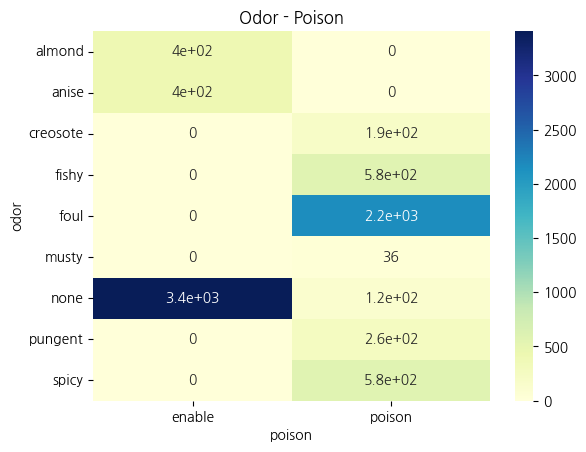

In [9]:
sns.heatmap(pd.crosstab(Mush['odor'], Mush['poison']), annot=True, cmap="YlGnBu")
plt.title("Odor - Poison")
plt.show()

# sns.heatmap(crosstab_bruises, annot=True, cmap="YlGnBu")
# plt.title("Bruises - Poison")
# plt.show()

In [10]:
def just_cross(col):
    col = str(col)
    a = pd.crosstab(Mush[col], Mush['poison'])
    return a

In [11]:
col = 'odor'
print(just_cross(col))

poison    enable  poison
odor                    
almond       400       0
anise        400       0
creosote       0     192
fishy          0     576
foul           0    2160
musty          0      36
none        3408     120
pungent        0     256
spicy          0     576


In [12]:
# xptmxm
row = 3
col = 2
idx = 0
test_list = []
ax_1= 0
ax_2 = 0
# for c in list(Mush.columns[1:]):
for c in range(6):
    if idx % col == 0 :
        ax_1 += 1

    if idx / col in range(1,5) :
        ax_2 = 0
    print(f'axes[{ax_1-1},{ax_2}]')
    ax_2 += 1   # 더하다가 0되는 순간 0
    idx += 1

    test_list.append(f'axes[{ax_1-1},{ax_2}]')

axes[0,0]
axes[0,1]
axes[1,0]
axes[1,1]
axes[2,0]
axes[2,1]


In [13]:
for c in list(Mush.columns[1:]):
    print(just_cross(c))

poison    enable  poison
odor                    
almond       400       0
anise        400       0
creosote       0     192
fishy          0     576
foul           0    2160
musty          0      36
none        3408     120
pungent        0     256
spicy          0     576
poison   enable  poison
bruises                
bruises    2752     624
no         1456    3292
poison             enable  poison
spore_print_color                
black                1648     224
brown                1744     224
buff                   48       0
chocolate              48    1584
green                   0      72
orange                 48       0
purple                 48       0
white                 576    1812
yellow                 48       0
poison      enable  poison
population                
abundant       384       0
clustered      288      52
nscattered     880     368
numerous       400       0
several       1192    2848
solitary      1064     648
poison   enable  poison
habitat        

In [14]:
def subplot_maker(row,col):
    row = int(row)
    col = int(col)
    axes_list = []

    fig, axes = plt.subplots(row, col, figsize=(row*5, col*6))  # 서브플롯 판 제작
    fig.suptitle('독성과 각 변수간 카이제곱', fontsize = 15 )       # 서브플롯 타이틀 
 
    idx = 0 #   # axes 위치잡는용
    ax_1 = 0
    ax_2 = 0
    for c in list(Mush.columns[1:]):
        if idx % col == 0 :
            ax_1 += 1
        if idx / col in range(1,100) :
            ax_2 = 0

        axes_list.append(f'axes[{ax_1-1},{ax_2}]')
        temp = axes[ax_1-1, ax_2]
        axes[ax_1-1, ax_2].set_title(c)
        ax_2 += 1
        idx += 1   

        idx_ax = 0

        sns.heatmap(just_cross(c), annot=True, cmap="YlGnBu", ax=temp)
        idx_ax += 1

    plt.subplots_adjust(left=0.07, right=0.93, top=0.92, bottom=0.08, wspace=0.3, hspace=0.3)

    plt.show()


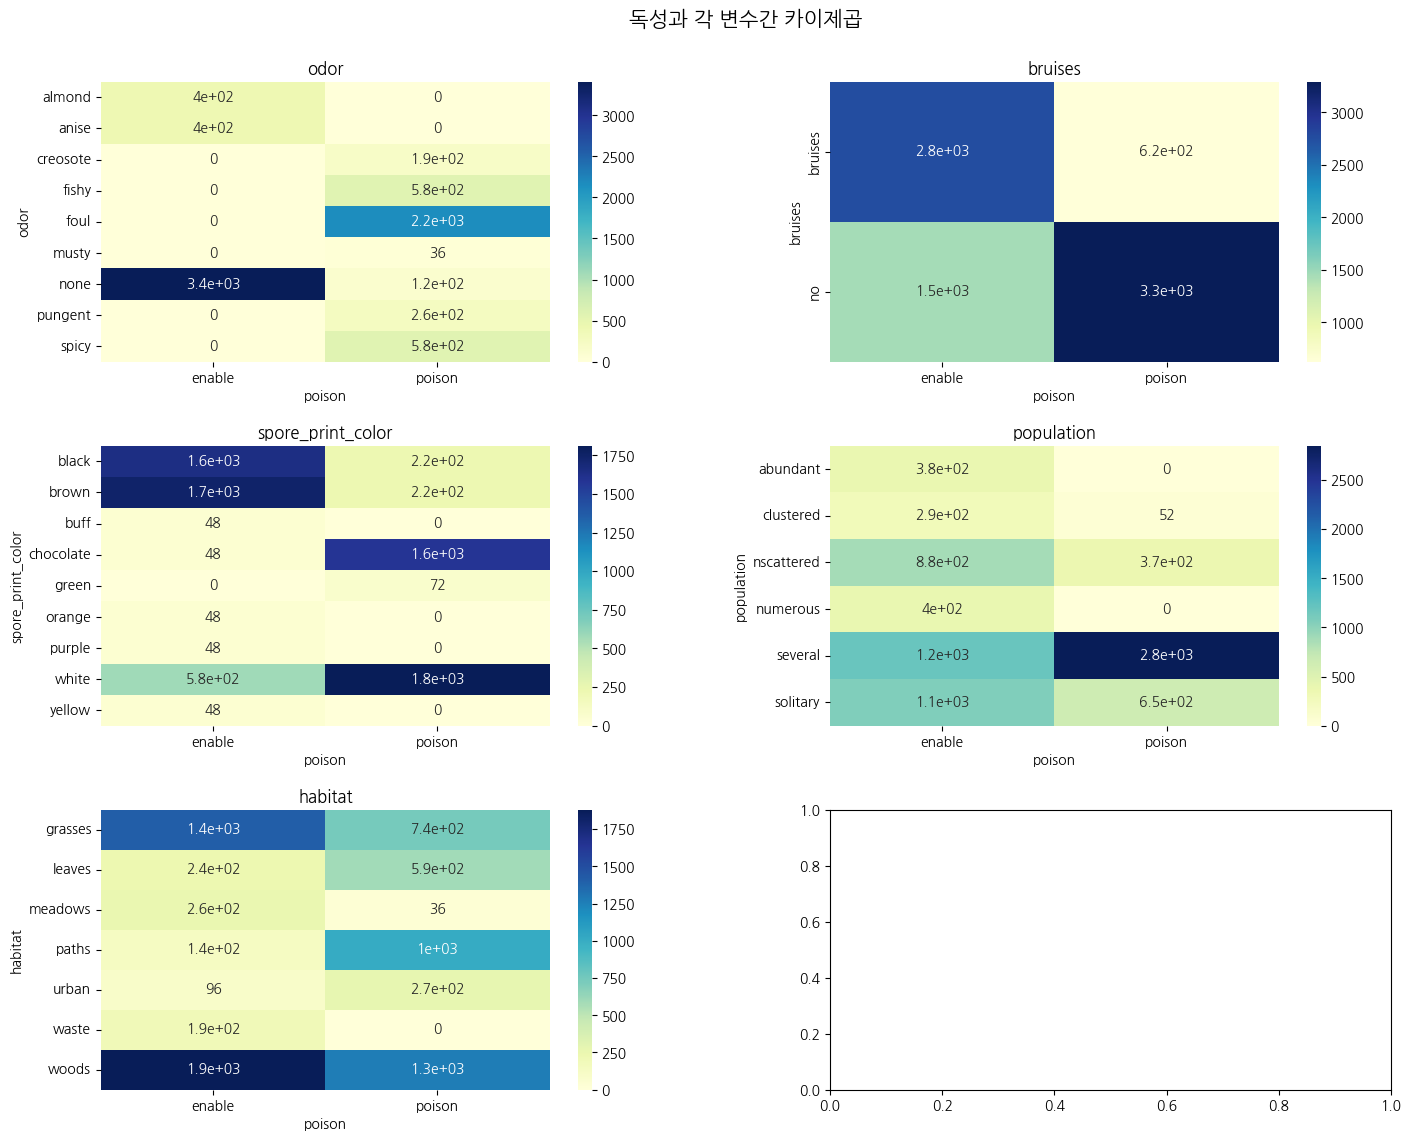

In [15]:
subplot_maker(3,2)

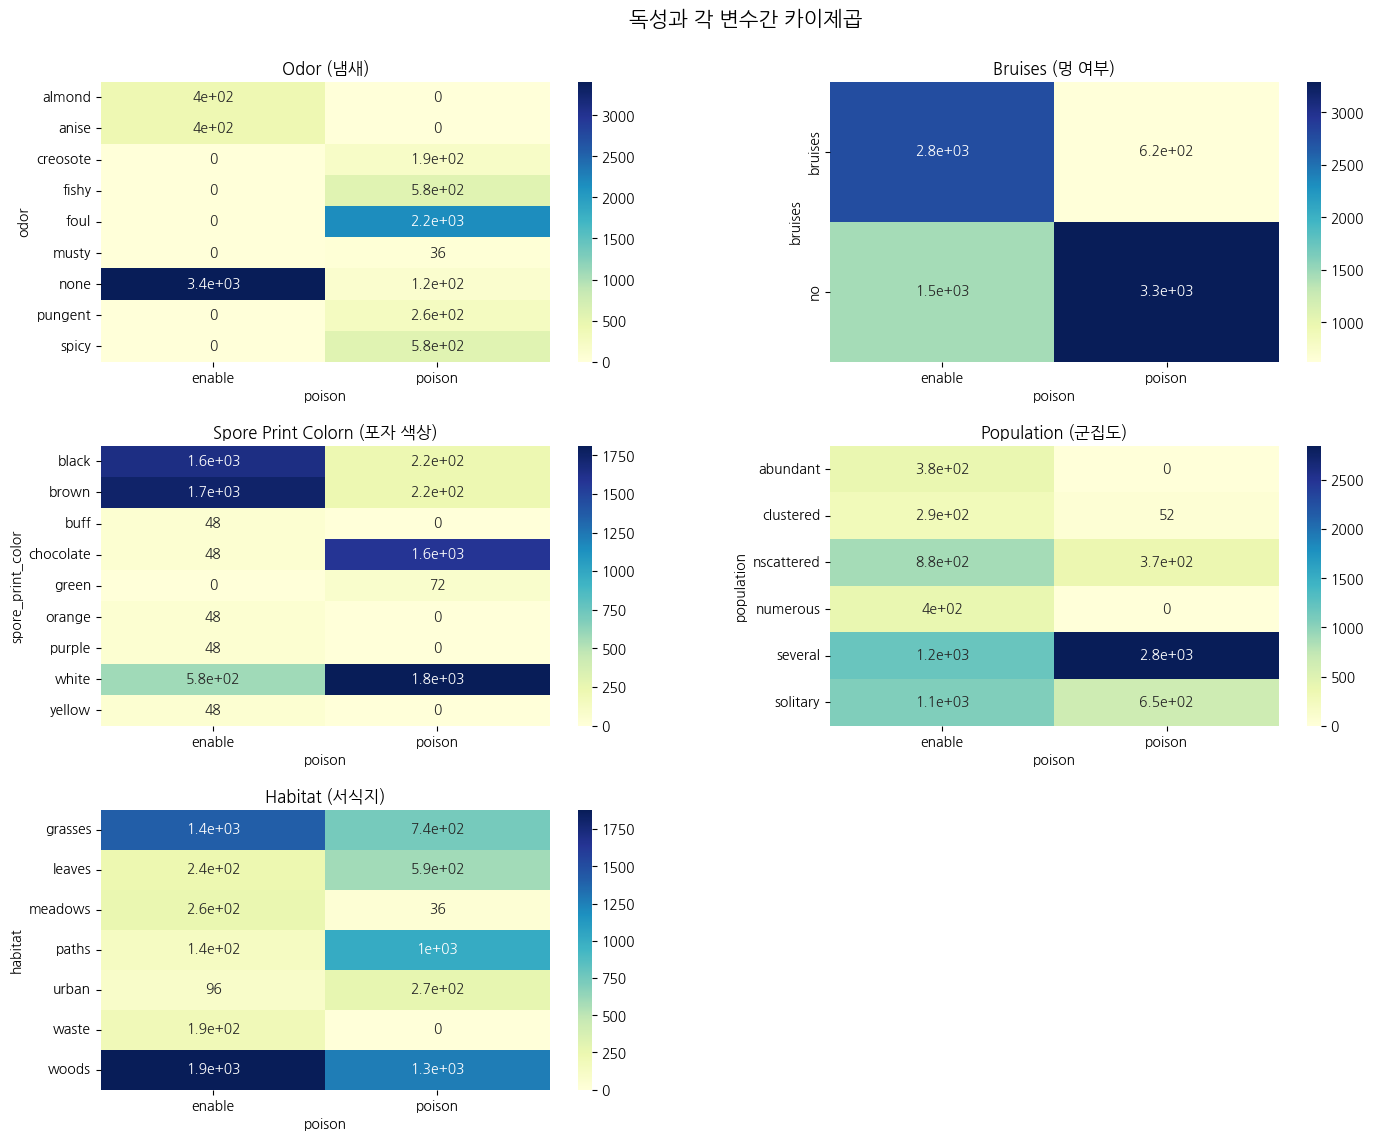

In [16]:

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
# axes.title('')
# fig.title('전체')
fig.suptitle('독성과 각 변수간 카이제곱', fontsize = 15 )



axes[0, 0].set_title("Odor (냄새)")
axes[0, 1].set_title("Bruises (멍 여부)")
axes[1, 0].set_title("Spore Print Colorn (포자 색상)")
axes[1, 1].set_title("Population (군집도)")
axes[2, 0].set_title("Habitat (서식지)")

sns.heatmap(just_cross('odor'), annot=True, cmap="YlGnBu", ax=axes[0, 0])
sns.heatmap(just_cross('bruises'), annot=True, cmap="YlGnBu", ax=axes[0, 1])
sns.heatmap(just_cross('spore_print_color'), annot=True, cmap="YlGnBu", ax=axes[1, 0])
sns.heatmap(just_cross('population'), annot=True, cmap="YlGnBu", ax=axes[1, 1])
sns.heatmap(just_cross('habitat'), annot=True, cmap="YlGnBu", ax=axes[2, 0])
fig.delaxes(axes[2, 1])

plt.subplots_adjust(left=0.07, right=0.93, top=0.92, bottom=0.08, wspace=0.3, hspace=0.3)

plt.show()

In [20]:
Mush = Mush[Mush['poison']=='poison']

,poison,odor,bruises,spore_print_color,population,habitat
0,poison,pungent,bruises,black,nscattered,urban
3,poison,pungent,bruises,black,nscattered,urban
8,poison,pungent,bruises,black,several,grasses
13,poison,pungent,bruises,brown,several,urban
17,poison,pungent,bruises,black,nscattered,grasses
...,...,...,...,...,...,...
8114,poison,musty,no,white,clustered,woods
8116,poison,spicy,no,white,several,leaves
8117,poison,fishy,no,white,several,woods
8118,poison,foul,no,white,several,woods


In [24]:
temp = pd.crosstab(Mush['bruises'], Mush['odor'])
temp_chi = chi2_contingency(temp)[0]
temp_p_value = chi2_contingency(temp)[1]

print(temp_p_value)

0.0


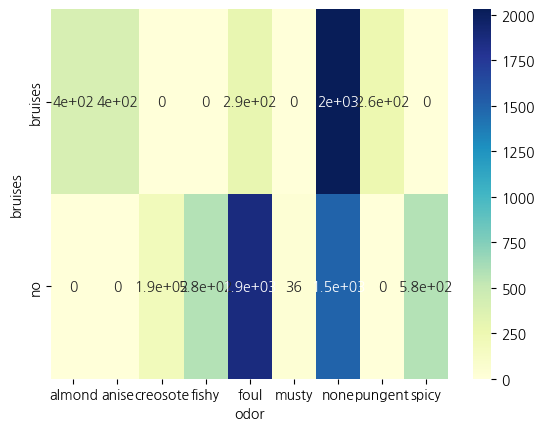

In [26]:
sns.heatmap(temp, annot=True, cmap="YlGnBu")
plt.show()

In [34]:
def just_cross(first, second):
    a = pd.crosstab(Mush[first], Mush[second])
    return a

In [57]:
def subplot_maker(row,col):
    row = int(row)
    col = int(col)
    axes_list = []

    fig, axes = plt.subplots(row, col, figsize=(row*2, col*10))  # 서브플롯 판 제작  # 사이즈 보고 알아서 비율 맞출 것.....
    fig.suptitle('변수간 카이제곱', fontsize = 15 )       # 서브플롯 타이틀 
 
    idx = 0 #   # axes 위치잡는용
    ax_1 = 0
    ax_2 = 0

    # Mush 데이터 프레임 자체 칼럼 값으로 제작. list 형식만 바꾼다면 그 리스트 값에 맞는 칼럼만 들고와서 표 제작.
    for i in list(Mush.columns[1:]):
        for j in list(Mush.columns[2:]):
            if i == j:
                pass
            else:
                if idx % col == 0 :
                        ax_1 += 1
                if idx / col in range(1,1000) :
                        ax_2 = 0

                axes_list.append(f'axes[{ax_1-1},{ax_2}]')
                temp = axes[ax_1-1, ax_2]
                axes[ax_1-1, ax_2].set_title(f'{i} - {j}')
                ax_2 += 1
                idx += 1   

                idx_ax = 0
                sns.heatmap(just_cross(i,j), annot=True, cmap="YlGnBu", ax=temp)
                idx_ax += 1

    # plt.subplots_adjust(left=0.07, right=0.93, top=0.92, bottom=0.18, wspace=0.3, hspace=0.3) # 아래코드와 효과는 같으나 하나하나 값 부여해야해서 일단 주석처리.
    plt.tight_layout(pad=3.0)   # 레이아웃 타이틀, 레이블 겹치지 않게 조정하는 용 

    plt.show()

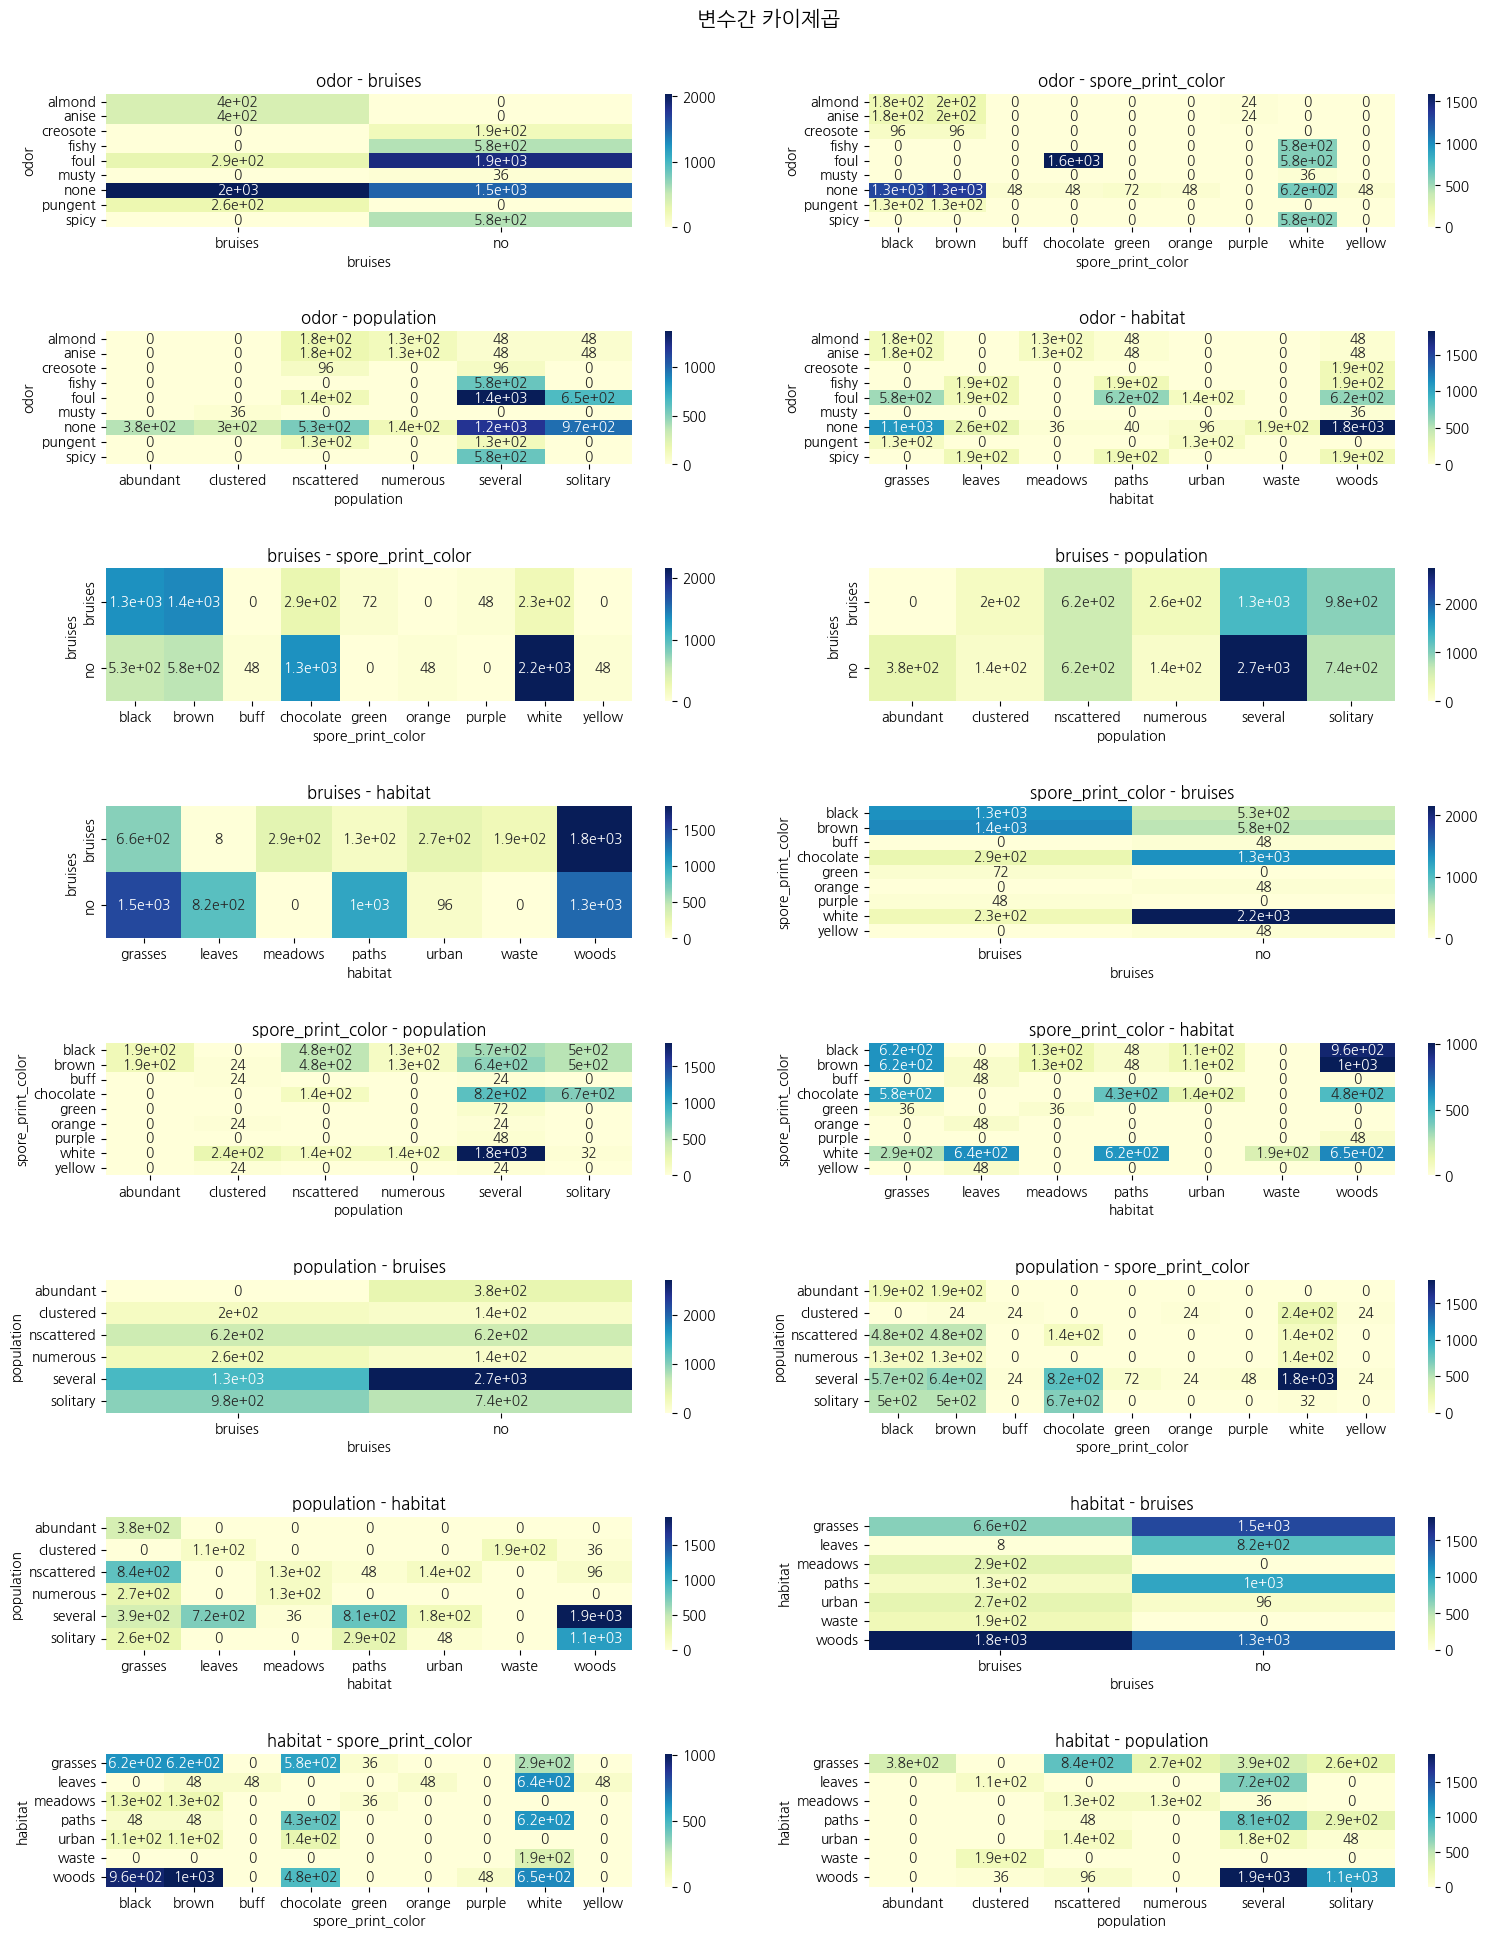

In [58]:
subplot_maker(8,2)